<a href="https://colab.research.google.com/github/gbnegrini/monitoria-processamento-imagens/blob/main/INF0018_3_Manipulacao_DICOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<center>UNIVERSIDADE FEDERAL DE CIÊNCIAS DA SAÚDE DE PORTO ALEGRE</center>
##<center>Introdução ao Processamento Digital de Imagens</center>

## Material de apoio
### Monitor: Guilherme Bauer Negrini (guilhermebn@ufcspa.edu.br)
_______

# Documentação básica sobre leitura, acesso, modificação e escrita de arquivos DICOM

## [pydicom](https://pydicom.github.io/pydicom/stable/tutorials/dataset_basics.html)

## [imageio](https://imageio.readthedocs.io/en/stable/examples.html#read-medical-data-dicom)


____________________
# Bibliotecas e pacotes

In [ ]:
!pip install pydicom

     |████████████████████████████████| 1.9MB 5.4MB/s 


In [ ]:
import numpy as np
import imageio
from pydicom import dcmread
import matplotlib.pyplot as plt
%matplotlib inline

_______
# Tutorial

## Fontes das imagens

- [Rubo Medical Imaging](https://www.rubomedical.com/dicom_files/index.html)

________________________
***FAÇA VOCÊ***

Baixe e faça o upload do [arquivo](https://drive.google.com/file/d/1bJvVj9ujkVxM_T3FIl0WSNQATYjtjiDG/view?usp=sharing) DICOM
_____________________


## **pydicom**

### Carregar arquivos

In [ ]:
dicom_ds = dcmread("0015.DCM")

### Visualizar a lista de elementos de dados

In [ ]:
print(dicom_ds)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 202
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: X-Ray Radiofluoroscopic Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.113619.2.15.1008000062035011254.825190719.0.31.2.1
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.840.113619.6.36
(0002, 0013) Implementation Version Name         SH: '1_2_5'
(0002, 0016) Source Application Entity Title     AE: 'ard-demo'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'SINGLE PLANE']
(0008, 0016) SOP Class UID                       UI: X-Ray Radiofluoroscopic Image Storage
(0008, 0018) SOP Instance UID                   

### Metadados

In [ ]:
dicom_ds.file_meta

(0002, 0000) File Meta Information Group Length  UL: 202
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: X-Ray Radiofluoroscopic Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.113619.2.15.1008000062035011254.825190719.0.31.2.1
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.840.113619.6.36
(0002, 0013) Implementation Version Name         SH: '1_2_5'
(0002, 0016) Source Application Entity Title     AE: 'ard-demo'

### Acessando elementos pelas tags

In [ ]:
dicom_ds[0x0008,0x0016]

(0008, 0016) SOP Class UID                       UI: X-Ray Radiofluoroscopic Image Storage

### Acessando o array da imagem

In [ ]:
img_xray = dicom_ds.pixel_array
img_xray.shape

(1024, 1024)

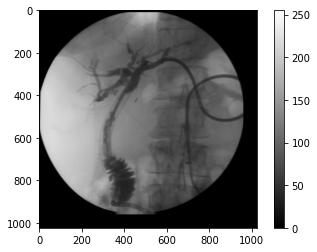

In [ ]:
plt.imshow(img_xray, cmap="gray", vmin=0, vmax=255)
plt.colorbar()

### Outro exemplo

Exemplo disponível na [documentação](https://pydicom.github.io/pydicom/stable/auto_examples/input_output/plot_read_dicom.html#sphx-glr-auto-examples-input-output-plot-read-dicom-py).


File path........: /usr/local/lib/python3.6/dist-packages/pydicom/data/test_files/CT_small.dcm
SOP Class........: 1.2.840.10008.5.1.4.1.1.2 (CT Image Storage)

Patient's Name...: CompressedSamples, CT1
Patient ID.......: 1CT1
Modality.........: CT
Study Date.......: 20040119
Image size.......: 128 x 128
Pixel Spacing....: [0.661468, 0.661468]
Slice location...: -77.2040634155


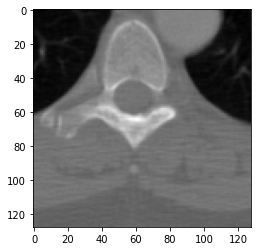

In [ ]:
# authors : Guillaume Lemaitre <g.lemaitre58@gmail.com>
# license : MIT

import matplotlib.pyplot as plt
from pydicom import dcmread
from pydicom.data import get_testdata_file

fpath = get_testdata_file('CT_small.dcm')
ds = dcmread(fpath)

# Normal mode:
print()
print(f"File path........: {fpath}")
print(f"SOP Class........: {ds.SOPClassUID} ({ds.SOPClassUID.name})")
print()

pat_name = ds.PatientName
display_name = pat_name.family_name + ", " + pat_name.given_name
print(f"Patient's Name...: {display_name}")
print(f"Patient ID.......: {ds.PatientID}")
print(f"Modality.........: {ds.Modality}")
print(f"Study Date.......: {ds.StudyDate}")
print(f"Image size.......: {ds.Rows} x {ds.Columns}")
print(f"Pixel Spacing....: {ds.PixelSpacing}")

# use .get() if not sure the item exists, and want a default value if missing
print(f"Slice location...: {ds.get('SliceLocation', '(missing)')}")

# plot the image using matplotlib
plt.imshow(ds.pixel_array, cmap=plt.cm.gray)
plt.show()

## **ImageIO**

### Carregar arquivos

In [ ]:
im = imageio.imread("0015.DCM")
im.shape

(1024, 1024)

### Metadados

In [ ]:
im.meta

Dict([('TransferSyntaxUID', '1.2.840.10008.1.2.1'),
      ('SOPClassUID', '1.2.840.10008.5.1.4.1.1.12.2'),
      ('SOPInstanceUID',
       '1.2.840.113619.2.15.1008000062035011254.825190719.0.31.2.1'),
      ('StudyDate', '19960308'),
      ('SeriesDate', '19960308'),
      ('AcquisitionDate', '19960308'),
      ('ContentDate', '19960308'),
      ('StudyTime', ''),
      ('AcquisitionTime', '105650'),
      ('ContentTime', '105650'),
      ('Modality', 'RF'),
      ('Manufacturer', 'GE MEDICAL SYSTEMS'),
      ('StudyDescription', '5'),
      ('SeriesDescription', ''),
      ('PatientName', 'Rubo DEMO'),
      ('PatientID', '10-55-87'),
      ('PatientBirthDate', ''),
      ('PatientSex', 'F '),
      ('PatientAge', ''),
      ('StudyInstanceUID',
       '1.2.840.113619.2.15.1008000062035011254.825190719.2.31'),
      ('SeriesInstanceUID',
       '1.2.840.113619.2.15.1008000062035011254.825190719.1.31'),
      ('SeriesNumber', 1),
      ('InstanceNumber', 2),
      ('PatientOrientation

In [ ]:
im.meta["BitsAllocated"]

8

### Acessando o array da imagem

In [ ]:
im

Array([[46, 49, 46, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

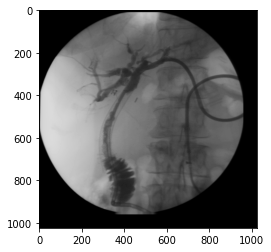

In [ ]:
plt.imshow(im, cmap="gray", vmin=0, vmax=255)